<a href="https://colab.research.google.com/github/ruthiang/Ruth_data690/blob/main/assignment_05/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive Notebooks Tutorial
## 2/28/22
## Ruth Iang

## Part 1: Everything is a cell

In [1]:
1+3

4

In [2]:
print("hello world")

hello world


In [3]:
print("hello world"*3)

hello worldhello worldhello world


In [4]:
1+5

6

In [5]:
2*2

4

In [ ]:
# command A for new cell above selected cell
# 2 times the D key to delete
# letter B to create a cell below the currently selected one
# behavior of your work will change depending on the mode that it's currently activated
# edition mode: append to cell. Command mode: do something associated to the key
# cell is grayed out during command mode
# click outside to get in command mode and vice versa
# escape key to switch modes
# M key for markdown and Y for python
# control Z to undo
# shift return to execute current cell
# control return to run selected cells

## Part 2: Working with code

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

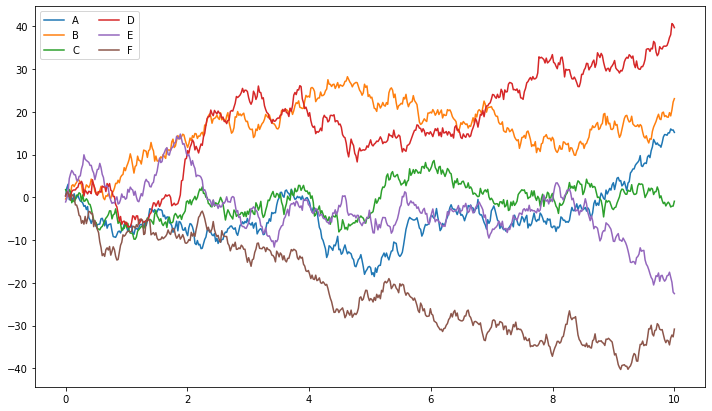

In [8]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

## Part 3: Interacting with data

In [9]:
import requests
import pandas as pd


In [10]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={'periods': '3600','after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [11]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-21 22:35:11.704962')

In [12]:
btc = get_historic_price("btc","bitstamp", after = last_week)

In [13]:
eth = get_historic_price("eth", "bitstamp", after=last_week)

In [14]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-21 23:00:00,37057.91,37778.15,36810.72,37578.07,225.769937,8.419755e+06
2022-02-22 00:00:00,37546.24,37696.63,36861.79,37076.60,203.664081,7.570883e+06
2022-02-22 01:00:00,37036.98,37346.62,36859.94,37224.02,43.763056,1.624729e+06
2022-02-22 02:00:00,37258.22,37462.33,36896.24,37270.54,71.770568,2.666543e+06
2022-02-22 03:00:00,37238.37,37255.66,36923.32,37041.99,131.595392,4.868238e+06


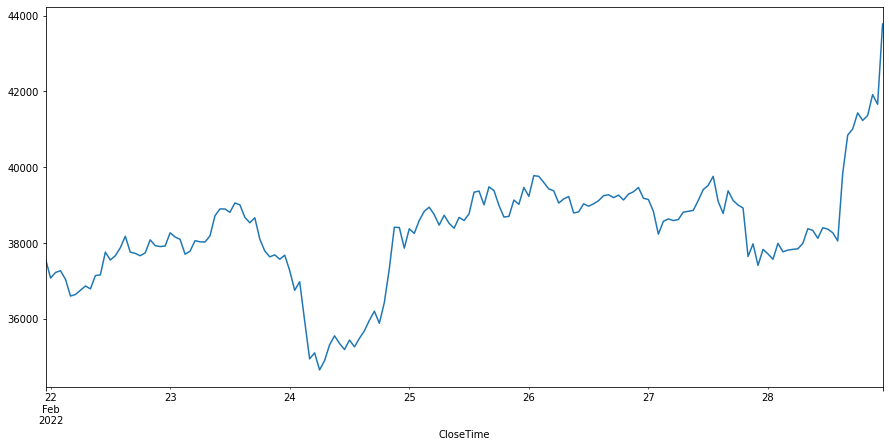

In [15]:
btc ["ClosePrice"].plot(figsize = (15,7))

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-21 23:00:00,2580.52,2640.24,2567.95,2624.47,1162.730396,3.027269e+06
2022-02-22 00:00:00,2620.69,2628.04,2560.59,2571.59,1407.957065,3.637591e+06
2022-02-22 01:00:00,2570.00,2607.30,2554.00,2595.95,473.105650,1.221354e+06
2022-02-22 02:00:00,2600.75,2621.42,2568.93,2602.22,408.386620,1.059510e+06
2022-02-22 03:00:00,2601.25,2601.25,2566.85,2579.33,586.172663,1.512546e+06


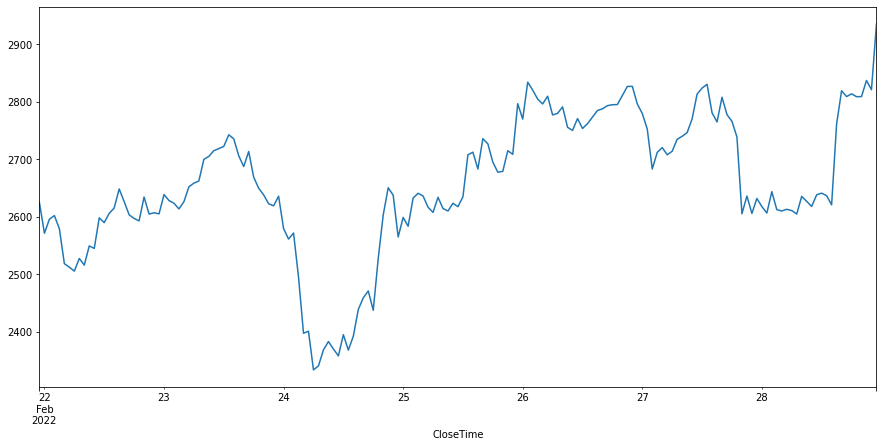

In [17]:
eth["ClosePrice"].plot(figsize=(15,7))

## Bonus: Dynamic plots with Bokeh

In [18]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [19]:
output_notebook

<function bokeh.io.output.output_notebook>

In [24]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Part 4: Exporting to Excel

In [29]:
writer = pd.ExcelWriter("cryptos.xlsx")

In [28]:
btc.to_excel(writer, sheet_name='Bitcoin') # write as separate sheets

In [30]:
eth.to_excel(writer, sheet_name='Ether')

In [32]:
writer.save()  #saving the file